[View in Colaboratory](https://colab.research.google.com/github/RaulMedeiros/Colab_paper/blob/master/Train_a_simple_CNN_on_the_MNIST_dataset.ipynb)

# Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

### Configuration

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.


### Load Data

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


###Plots a random sample from the training dataset.

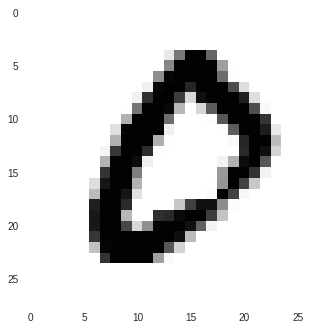

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.grid(False)
plt.show()

### Format images to the order requested by Tensflow backgroud API.

In [4]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
input_shape

(28, 28, 1)

### Normalize MNIST images between 0 and 1.

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Convert labes to One-Hot Format.

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build Deep Model architecture.

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


### Set the training configurations: loss (objetctive func.), optimization strategy and the evaluation metric.

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Train the model using GPU

In [9]:
%%time
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.2736 - acc: 0.9148 - val_loss: 0.0585 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0984 - acc: 0.9709 - val_loss: 0.0513 - val_acc: 0.9828
Epoch 3/12
28800/60000 [=============>................] - ETA: 5s - loss: 0.0805 - acc: 0.9766

60000/60000 [==============================] - 10s 170us/step - loss: 0.0776 - acc: 0.9773 - val_loss: 0.0347 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0644 - acc: 0.9811 - val_loss: 0.0309 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0565 - acc: 0.9830 - val_loss: 0.0314 - val_acc: 0.9892
Epoch 6/12
  128/60000 [..............................] - ETA: 10s - loss: 0.0323 - acc: 0.9922

60000/60000 [==============================] - 10s 170us/step - loss: 0.0514 - acc: 0.9848 - val_loss: 0.0313 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0475 - acc: 0.9858 - val_loss: 0.0271 - val_acc: 0.9901
Epoch 8/12
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0444 - acc: 0.9865

60000/60000 [==============================] - 10s 170us/step - loss: 0.0442 - acc: 0.9866 - val_loss: 0.0275 - val_acc: 0.9907
Epoch 9/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0420 - acc: 0.9870 - val_loss: 0.0271 - val_acc: 0.9902
Epoch 10/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0394 - acc: 0.9879 - val_loss: 0.0272 - val_acc: 0.9907
Epoch 11/12
 4736/60000 [=>............................] - ETA: 8s - loss: 0.0375 - acc: 0.9901

60000/60000 [==============================] - 10s 170us/step - loss: 0.0371 - acc: 0.9885 - val_loss: 0.0266 - val_acc: 0.9908
Epoch 12/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0366 - acc: 0.9888 - val_loss: 0.0254 - val_acc: 0.9911
CPU times: user 1min 28s, sys: 40.2 s, total: 2min 8s
Wall time: 2min 5s


### Compute Evaluation Metric

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02743976174756099
Test accuracy: 0.9915


## Train the model using only CPU.

In [9]:
%%time
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.2849 - acc: 0.9118 - val_loss: 0.0585 - val_acc: 0.9808
Epoch 2/12
14080/60000 [======>.......................] - ETA: 1:59 - loss: 0.1213 - acc: 0.9643

60000/60000 [==============================] - 163s 3ms/step - loss: 0.1021 - acc: 0.9699 - val_loss: 0.0442 - val_acc: 0.9860
Epoch 3/12
39808/60000 [==================>...........] - ETA: 52s - loss: 0.0790 - acc: 0.9763

60000/60000 [==============================] - 162s 3ms/step - loss: 0.0790 - acc: 0.9764 - val_loss: 0.0377 - val_acc: 0.9865
Epoch 4/12
49664/60000 [=======================>......] - ETA: 26s - loss: 0.0672 - acc: 0.9791

60000/60000 [==============================] - 161s 3ms/step - loss: 0.0675 - acc: 0.9791 - val_loss: 0.0313 - val_acc: 0.9888
Epoch 5/12
53376/60000 [=========================>....] - ETA: 17s - loss: 0.0572 - acc: 0.9830

60000/60000 [==============================] - 162s 3ms/step - loss: 0.0582 - acc: 0.9828 - val_loss: 0.0301 - val_acc: 0.9897
Epoch 6/12
54784/60000 [==========================>...] - ETA: 13s - loss: 0.0529 - acc: 0.9838

60000/60000 [==============================] - 164s 3ms/step - loss: 0.0535 - acc: 0.9837 - val_loss: 0.0281 - val_acc: 0.9902
Epoch 7/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0501 - acc: 0.9852

60000/60000 [==============================] - 167s 3ms/step - loss: 0.0508 - acc: 0.9851 - val_loss: 0.0279 - val_acc: 0.9911
Epoch 8/12
55552/60000 [==========================>...] - ETA: 11s - loss: 0.0455 - acc: 0.9862

60000/60000 [==============================] - 167s 3ms/step - loss: 0.0455 - acc: 0.9862 - val_loss: 0.0286 - val_acc: 0.9899
Epoch 9/12
55552/60000 [==========================>...] - ETA: 11s - loss: 0.0447 - acc: 0.9866

60000/60000 [==============================] - 164s 3ms/step - loss: 0.0449 - acc: 0.9865 - val_loss: 0.0254 - val_acc: 0.9918
Epoch 10/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0437 - acc: 0.9863

60000/60000 [==============================] - 164s 3ms/step - loss: 0.0431 - acc: 0.9866 - val_loss: 0.0275 - val_acc: 0.9909
Epoch 11/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0409 - acc: 0.9873

60000/60000 [==============================] - 167s 3ms/step - loss: 0.0413 - acc: 0.9873 - val_loss: 0.0278 - val_acc: 0.9918
Epoch 12/12
55296/60000 [==========================>...] - ETA: 12s - loss: 0.0385 - acc: 0.9885

60000/60000 [==============================] - 166s 3ms/step - loss: 0.0386 - acc: 0.9885 - val_loss: 0.0250 - val_acc: 0.9917
CPU times: user 1h 2min 32s, sys: 48.9 s, total: 1h 3min 21s
Wall time: 32min 50s


### Compute Evaluation Metric

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024995064804670255
Test accuracy: 0.9917
